# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

5.1.0


In [3]:
init_notebook_mode(connected=True)

# Load Data

In [4]:
coca_cola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [5]:
coca_cola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [6]:
coca_cola.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [7]:
coca_cola.shape

(42, 2)

In [8]:
coca_cola.dtypes

Quarter     object
Sales      float64
dtype: object

In [9]:
coca_cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [10]:
coca_cola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [11]:
coca_cola.corr()

,Sales
Sales,1.0


# EDA

## Data Visualization

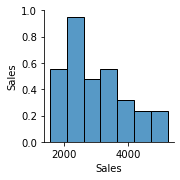

In [12]:
sns.pairplot(coca_cola)

<AxesSubplot:xlabel='Sales'>

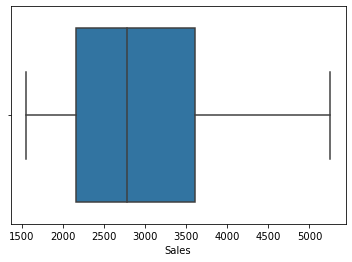

In [13]:
sns.boxplot(x = 'Sales', data = coca_cola)

In [14]:
coca_cola.count().iplot(kind = 'bar')

In [15]:
coca_cola.iplot(kind = 'box')

In [16]:
coca_cola['Sales'].iplot(kind = 'hist', bins = 30)

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



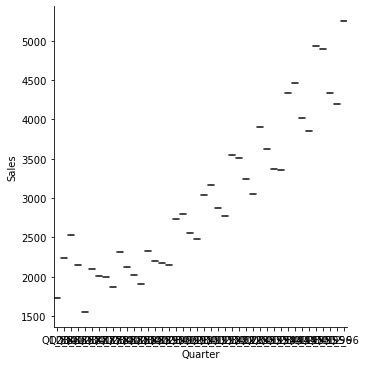

In [17]:
sns.catplot("Quarter","Sales",data=coca_cola,kind="box")

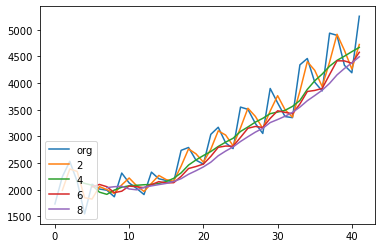

In [18]:
coca_cola.Sales.plot(label="org")
for i in range(2,10,2):
    coca_cola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<AxesSubplot:>

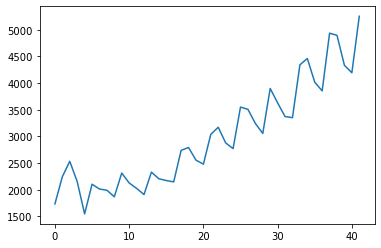

In [19]:
coca_cola.Sales.plot()

## Preprocessing

In [20]:
quarter=['Q1','Q2','Q3','Q4']
n=coca_cola['Quarter'][0]
n[0:2]

'Q1'

In [21]:
coca_cola['quarter']=0
for i in range(42):
    n=coca_cola['Quarter'][i]
    coca_cola['quarter'][i]=n[0:2]
    dummy=pd.DataFrame(pd.get_dummies(coca_cola['quarter']))
    coco1=pd.concat((coca_cola,dummy),axis=1)
t= np.arange(1,43)
coco1['t']=t
coco1['t_square']=coco1['t']*coco1['t']
log_Sales=np.log(coco1['Sales'])
coco1['log_Sales']=log_Sales

In [22]:
coco1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


<AxesSubplot:xlabel='quarter', ylabel='Sales'>

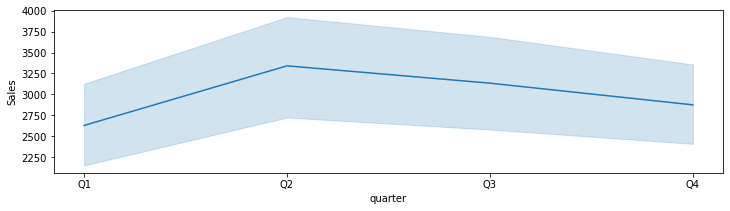

In [23]:
plt.figure(figsize=(12,3))
sns.lineplot(x="quarter",y="Sales",data=coca_cola)

## Train Test Split Data

In [24]:
Train = coco1.head(34)

In [25]:
Test = coco1.iloc[34:38,:]

In [26]:
predict_data = coco1.tail(4)

In [27]:
coca_cola2= coco1.iloc[0:38,:]

In [28]:
Train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [29]:
Test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
34,Q3_94,4461.0,Q3,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311


In [30]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


## Built Model And Evaluate RMSE Value

### Linear Model

In [31]:
import statsmodels.formula.api as smf 
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

669.4685590402652

### Exponential

In [32]:
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

564.5012993862682

### Quadratic

In [33]:
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

394.67472775415024

### Additive Seasonality

In [34]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1686.7389646362876

### Additive Seasonality Quadratic

In [35]:
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

174.88610047128853

### Multiplicative Seasonality

In [36]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1757.7740414202294

### Multiplicative Additive Seasonality

In [37]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

404.56422621596505

## Compare The Results

In [38]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,174.886100
2,rmse_Quad,394.674728
6,rmse_Mult_add_sea,404.564226
1,rmse_Exp,564.501299
0,rmse_linear,669.468559
3,rmse_add_sea,1686.738965
5,rmse_Mult_sea,1757.774041


### Predict The New Model

In [39]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


## Built Model On The Entire Dataset

In [41]:
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=coca_cola2).fit()

In [42]:
pred_new  = pd.Series(add_sea_Quad.predict(predict_data))
pred_new

38    4839.220330
39    4731.881928
40    4668.345851
41    5399.952382
dtype: float64

In [43]:
predict_data["forecasted_Sales"] = pd.DataFrame(pred_new)

In [44]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales,forecasted_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970,4839.220330
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015,4731.881928
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410,4668.345851
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555,5399.952382
